In [157]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
gca = pd.read_csv('/Users/amitmishra/epl_2425/data/player_gca_2025_cleaned.csv')
poss = pd.read_csv('/Users/amitmishra/epl_2425/data/player_possession_2025_cleaned.csv')
defense = pd.read_csv('/Users/amitmishra/epl_2425/data/player_defense_2025_cleaned.csv')
passes = pd.read_csv('/Users/amitmishra/epl_2425/data/player_pass_2025_cleaned.csv')

In [159]:
gca = gca.reset_index(drop = True)
poss = poss.reset_index(drop = True)
passes = passes.reset_index(drop = True)
defense = defense.reset_index(drop = True)

In [160]:
gca = gca.drop(['Nation', 'Born', 'Matches'], axis = 1)
poss = poss.drop(['Nation', 'Born', 'Matches'], axis = 1)
passes = passes.drop(['Nation', 'Born', 'Matches'], axis = 1)
defense = defense.drop(['Nation', 'Born', 'Matches'], axis = 1)

In [161]:
poss.head()

,Player,Pos,Squad,Age,90s,Touches,Touches_DefPen,Touches_Def3rd,Touches_Mid3rd,Touches_Att3rd,...,Carries,TotDist,PrgDist,PrgC,Carry1/3,Carry_PA,Mis,Dis,Pass_Rec,Pass_PrgR
0,Joshua Acheampong,DF,Chelsea,18,1.9,137,7,48,81,8,...,106,709,409,0,2,0,2,0,111,0
1,Tyler Adams,MF,Bournemouth,25,21.8,1337,62,349,779,224,...,663,3337,1447,14,22,1,28,12,757,10
2,Tosin Adarabioyo,DF,Chelsea,26,15.7,1330,175,630,674,27,...,777,3207,1809,5,2,0,4,0,1000,1
3,Simon Adingra,"FW,MF",Brighton,22,12.2,548,10,66,174,315,...,366,2514,1300,50,21,27,39,12,388,136
4,Emmanuel Agbadou,DF,Wolves,27,15.7,1172,190,649,504,28,...,758,3670,1752,6,4,0,6,4,796,2


In [162]:
gca.dtypes

Player          object
Pos             object
Squad           object
Age             object
90s             object
SCA             object
SCA90           object
SCA_PassLive    object
SCA_PassDead    object
SCA_TO          object
SCA_Shot        object
SCA_Fld         object
SCA_DefAct      object
GCA             object
GCA90           object
GCA_PassLive    object
GCA_PassDead    object
GCA_TO          object
GCA_Shot        object
GCA_Fld         object
GCA_DefAct      object
dtype: object

In [163]:
text_cols = ['Player', 'Pos', 'Squad']

#Changing the datatypes for the gca dataframe

for col in gca.columns:
    if col not in text_cols:
        gca[col] = pd.to_numeric(gca[col], errors='coerce')

In [164]:
#Changing the datatypes for the possession dataframe

for poss_col in poss.columns:
    if poss_col not in text_cols:
        poss[poss_col] = pd.to_numeric(poss[poss_col], errors = 'coerce')
        
for pass_col in passes.columns:
    if pass_col not in text_cols:
        passes[pass_col] = pd.to_numeric(passes[pass_col], errors = 'coerce')
        
for def_col in defense.columns:
    if def_col not in text_cols:
        defense[def_col] = pd.to_numeric(defense[def_col], errors = 'coerce')

In [165]:
defense.columns

Index(['Player', 'Pos', 'Squad', 'Age', '90s', 'Tkl_attempted', 'TklW',
       'Tkl_Def', 'Tkl_Mid', 'Tkl_Att', 'Drib_Tkl', 'Drib_chal', 'Drib_Tkl%',
       'Chal_Lost', 'Blocks', 'Shots_blocked', 'Pass_blocked', 'Interceptions',
       'Tkl+Int', 'Clr', 'Err_shot'],
      dtype='object')

### Merging columns

In [166]:
#First let's specify only the features we want in each of the columns we want to merge

gca_features = ['Player', 'Pos', 'Squad', 'Age', '90s','SCA_TO', 'SCA_PassLive', 'SCA_Shot']
def_features = ['Player', 'Tkl_Mid', 'Tkl_Att', 'Interceptions']
poss_features = ['Player','Touches_Att3rd', 'Touches_AttPen', 'PrgC', 'Carry1/3', 'Carry_PA']


In [167]:
base_df = gca[gca_features]
df = base_df.merge(defense[def_features], on = 'Player', how = 'left')
df = df.merge(poss[poss_features], on = 'Player', how = 'left')
df.head()

,Player,Pos,Squad,Age,90s,SCA_TO,SCA_PassLive,SCA_Shot,Tkl_Mid,Tkl_Att,Interceptions,Touches_Att3rd,Touches_AttPen,PrgC,Carry1/3,Carry_PA
0,Joshua Acheampong,DF,Chelsea,18.0,1.9,0.0,2.0,0.0,0.0,0.0,1.0,8.0,3.0,0.0,2.0,0.0
1,Tyler Adams,MF,Bournemouth,25.0,21.8,0.0,35.0,1.0,49.0,8.0,32.0,224.0,18.0,14.0,22.0,1.0
2,Tosin Adarabioyo,DF,Chelsea,26.0,15.7,0.0,8.0,6.0,6.0,0.0,11.0,27.0,14.0,5.0,2.0,0.0
3,Simon Adingra,"FW,MF",Brighton,22.0,12.2,6.0,33.0,8.0,8.0,5.0,8.0,315.0,76.0,50.0,21.0,27.0
4,Emmanuel Agbadou,DF,Wolves,27.0,15.7,0.0,15.0,0.0,9.0,0.0,12.0,28.0,7.0,6.0,4.0,0.0


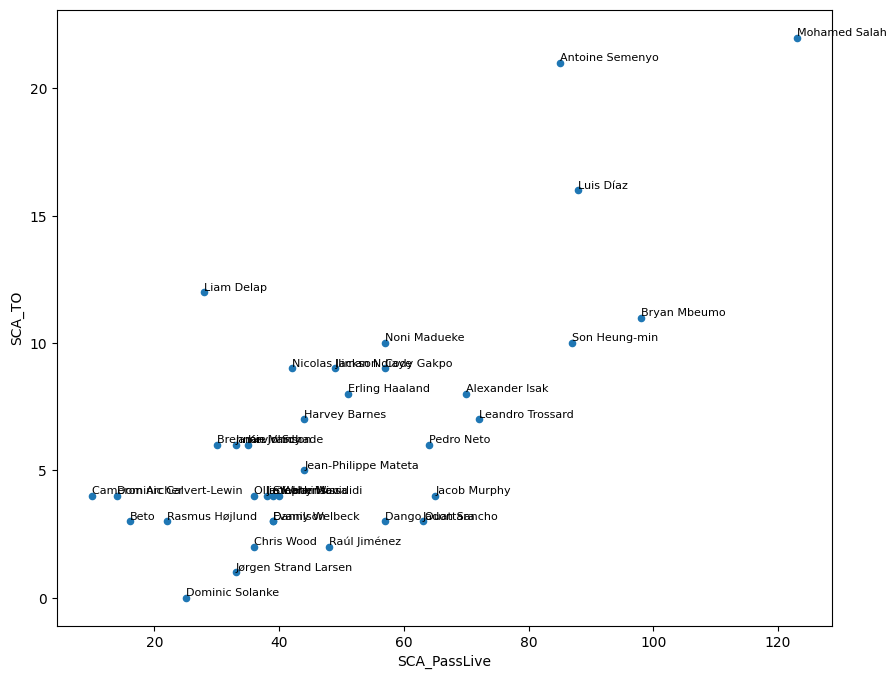

In [168]:
filtered_gca = df[(df['90s'] > 15) & (df['Pos'] == 'FW')]
ax = filtered_gca.plot(x='SCA_PassLive', y='SCA_TO', kind='scatter', figsize=(10,8))

for i, row in filtered_gca.iterrows():
    plt.text(row['SCA_PassLive'], row['SCA_TO'], row['Player'], 
             fontsize=8, ha='left', va='bottom')

In [180]:
df.columns

Index(['Player', 'Pos', 'Squad', 'Age', '90s', 'SCA_TO', 'SCA_PassLive',
       'SCA_Shot', 'Tkl_Mid', 'Tkl_Att', 'Interceptions', 'Touches_Att3rd',
       'Touches_AttPen', 'PrgC', 'Carry1/3', 'Carry_PA'],
      dtype='object')

### Choose features from the following to get similar players: 

#### 'SCA_TO', 'SCA_PassLive',
#### 'SCA_Shot', 'Tkl_Mid', 'Tkl_Att', 'Pass_blocked', 'Interceptions',
#### 'Touches_Att3rd', 'Touches_AttPen', 'PrgC', 'Carry_PA'

### Implementing cosine similarity

In [181]:
similar_features = ['SCA_TO', 'SCA_PassLive',
       'SCA_Shot', 'Tkl_Mid', 'Tkl_Att', 'Interceptions', 'Touches_Att3rd',
       'Touches_AttPen', 'PrgC', 'Carry1/3', 'Carry_PA']

def player_finder(df, target_player, features, top_n = 10):
    #Check if target player exists
    if target_player not in df['Player'].values:
        print(f'{target_player} not in the list')
        return None
    
    #Filter for more than 10 full games
    df_filtered = df[df['90s'] >10].copy()  
    
    #Select only the features we want to compare
    feature_data = df_filtered[features].copy()
    
    #Handle missing data
    feature_data = feature_data.fillna(0)
    
    #Standardize the features so the ones with greater magintude don't have a bigger say
    scaler = StandardScaler()
    feature_data_scaled = scaler.fit_transform(feature_data)
    
    #Find index of the target player
    target_idx = df_filtered[df_filtered['Player'] == target_player].index[0]
    target_player_idx = df_filtered.index.get_loc(target_idx)
    
    #Calculate cosine similarity
    similarities = cosine_similarity([feature_data_scaled[target_player_idx]], feature_data_scaled)[0]
    
    # Create results DataFrame
    results = df_filtered[['Player', 'Squad', 'Pos', 'Age'] + features].copy()
    results['Similarity'] = similarities
    
    # Sort by similarity (descending) and exclude the target player
    results = results[results['Player'] != target_player].sort_values('Similarity', ascending=False)
    
    return results.head(top_n) 

In [197]:
target_player = "Alexander Isak"
similar_players = player_finder(df, target_player, similar_features, top_n=10)

In [198]:
similar_players[(similar_players['Pos'] == 'FW') | (similar_players['Pos'] == 'FW,MF')]

,Player,Squad,Pos,Age,SCA_TO,SCA_PassLive,SCA_Shot,Tkl_Mid,Tkl_Att,Interceptions,Touches_Att3rd,Touches_AttPen,PrgC,Carry1/3,Carry_PA,Similarity
8741,Bukayo Saka,Arsenal,"FW,MF",22.0,12.0,71.0,10.0,11.0,9.0,3.0,715.0,162.0,96.0,32.0,51.0,0.949557
8742,Mohamed Salah,Liverpool,FW,32.0,22.0,123.0,14.0,5.0,9.0,9.0,1119.0,356.0,154.0,59.0,126.0,0.947710
6671,Gabriel Martinelli,Arsenal,"FW,MF",23.0,8.0,55.0,7.0,6.0,8.0,5.0,660.0,182.0,124.0,33.0,64.0,0.933163
547,Harvey Barnes,Newcastle Utd,FW,26.0,7.0,44.0,6.0,6.0,6.0,6.0,462.0,128.0,93.0,48.0,47.0,0.924506
4640,Son Heung-min,Tottenham,FW,32.0,10.0,87.0,7.0,8.0,6.0,5.0,668.0,122.0,96.0,49.0,44.0,0.923283
3627,Cody Gakpo,Liverpool,FW,25.0,9.0,57.0,7.0,13.0,9.0,12.0,557.0,110.0,59.0,34.0,28.0,0.905025
10268,Leandro Trossard,Arsenal,FW,29.0,7.0,72.0,6.0,16.0,9.0,9.0,762.0,158.0,80.0,55.0,30.0,0.899311
5141,Nicolas Jackson,Chelsea,FW,23.0,9.0,42.0,7.0,7.0,9.0,3.0,361.0,141.0,47.0,25.0,32.0,0.894355
